<a href="https://colab.research.google.com/github/Arjun-R-krishnan/DSML-Machine-Learning/blob/main/statics_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the necessary libraries


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

## Loading dataset

In [9]:
from google.colab import files

uploaded = files.upload()


Saving house_price.csv to house_price (1).csv


In [10]:
df=pd.read_csv('house_price.csv')

In [11]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [12]:
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0
price_per_sqft,0


## In this dataset no null values are present

In [13]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## from the above details we can see that some columns have extreme high values compared to the normal
# such as bhk and no of bathroom
## filtering the column of bathroom with lower than 5  and bhk 20 since the normal maximum no of bathrooms in house is 5 and room no is 20

In [14]:
new_df = df[(df['bath']<=5) & (df['bhk']<=20)]

In [15]:
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [16]:
new_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12691.000000,12691.000000,12691.000000,12691.00000,1.269100e+04
mean,1510.712274,2.512174,105.151410,2.64526,7.572415e+03
std,1127.654282,0.901049,128.371216,0.90437,1.069137e+05
min,1.000000,1.000000,8.000000,1.00000,2.670000e+02
25%,1100.000000,2.000000,49.000000,2.00000,4.243000e+03
50%,1268.000000,2.000000,70.000000,3.00000,5.360000e+03
75%,1650.000000,3.000000,112.000000,3.00000,7.091000e+03
max,52272.000000,5.000000,2912.000000,9.00000,1.200000e+07


## identyfying the outliers of price per square feet with the help of a boxplot

<Axes: ylabel='price_per_sqft'>

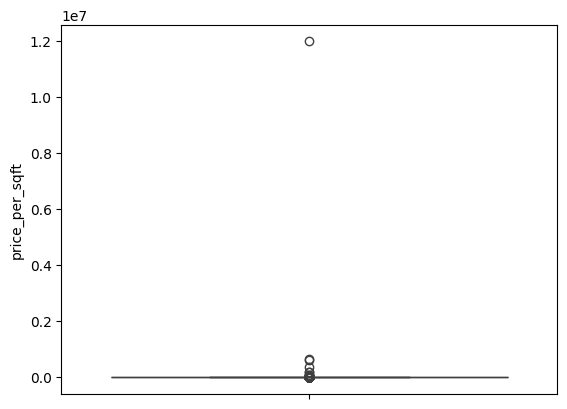

In [17]:
sns.boxplot(new_df['price_per_sqft'])

## Removing outliers using mean and standrad deviation

In [18]:
mean = new_df['price_per_sqft'].mean() #finding mean of the column price per sqft

In [19]:
std =new_df['price_per_sqft'].std() # finding std of the column price per sqft

In [20]:
mean

7572.414624537074

In [21]:
std

106913.68260208929

In [22]:
threshold =3


In [23]:
upper_threshold = mean+(threshold * std)

In [24]:
lower_threshold = mean-(threshold * std)

In [25]:
upper_threshold

328313.4624308049

In [26]:
lower_threshold

-313168.6331817308

## checking the oulier values


In [27]:
new_df.loc[(new_df['price_per_sqft'] >upper_threshold) | (new_df['price_per_sqft'] < lower_threshold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


# Removing outlier values by trimming

In [28]:
trimmed_df_using_mean_std = new_df[(new_df['price_per_sqft']> lower_threshold) & (new_df['price_per_sqft'] < upper_threshold)]

In [29]:
trimmed_df_using_mean_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

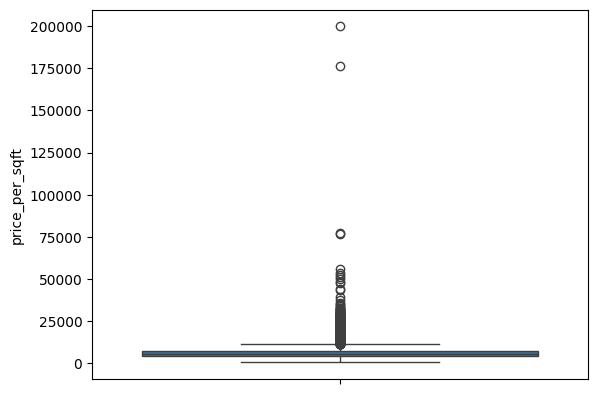

In [30]:
# plotting boxplot for checking the outliers
sns.boxplot(trimmed_df_using_mean_std['price_per_sqft'])

## Here we can see that the outliers have been reduced from the previous data

## detecting outliers using percentile method

In [31]:
lower_percentile = new_df['price_per_sqft'].quantile(0.05)

In [32]:
lower_percentile

3099.0

In [33]:
upper_percentile = new_df['price_per_sqft'].quantile(0.95)

In [34]:
upper_percentile

14408.0

## checking outlier values using perecntile method

In [35]:
new_df.loc[(new_df['price_per_sqft']< lower_percentile) | (new_df['price_per_sqft'] > upper_percentile)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13155,Kothannur,4 Bedroom,1600.0,4.0,45.0,4,2812
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


## removing the outliers

In [36]:
trimmed_df_using_percentile = new_df[(new_df['price_per_sqft']<upper_percentile) & (new_df['price_per_sqft']>lower_percentile)]

In [37]:
trimmed_df_using_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


## Creating a boxplot to check the outliers

<Axes: ylabel='price_per_sqft'>

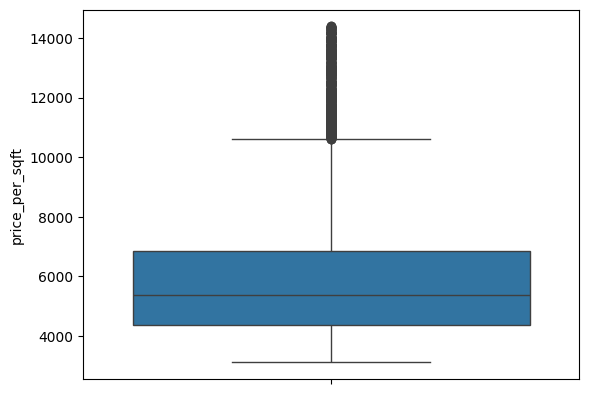

In [38]:
sns.boxplot(trimmed_df_using_percentile['price_per_sqft'])

In [39]:
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [40]:
trimmed_df_using_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


## Detecting outliers using IQR

In [42]:
Q1= new_df['price_per_sqft'].quantile(0.25)

In [43]:
Q3= new_df['price_per_sqft'].quantile(0.75)

In [44]:
Q1,Q3

(4243.0, 7091.0)

In [45]:
IQR = Q3-Q1

In [46]:
lower_quantile =Q1 - (1.5* IQR)

In [47]:
upper_quantile =Q3 + (1.5* IQR)

## outlier

In [48]:
new_df.loc[(new_df['price_per_sqft']>upper_quantile ) | (new_df['price_per_sqft'] < lower_quantile)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
56,other,2 BHK,1500.0,2.0,185.0,2,12333
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403
...,...,...,...,...,...,...,...
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [49]:
trimmed_df_using_iqr = new_df[(new_df['price_per_sqft']> lower_quantile) & (new_df['price_per_sqft']< upper_quantile)]

In [50]:
trimmed_df_using_iqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

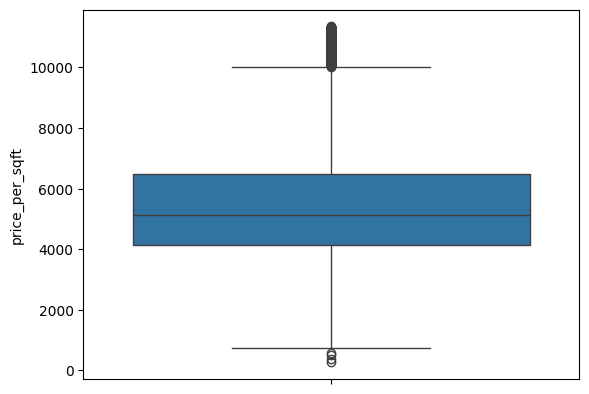

In [51]:
sns.boxplot(trimmed_df_using_iqr['price_per_sqft'])

## Outlier detection using z score method

In [53]:
new_df['z_score'] = (new_df.price_per_sqft-mean)/std

<ipython-input-53-84ee5ccb5148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['z_score'] = (new_df.price_per_sqft-mean)/std


In [54]:
mean

7572.414624537074

In [55]:
std

106913.68260208929

In [77]:
new_df.loc[(new_df['z_score']>-3) | (new_df['z_score'] <3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.036229
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.027662
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.030561
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.012416
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.031076
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.008263
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.033098
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.021648
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.026513


In [58]:
trimmed_df_using_zscore=new_df[(new_df['z_score']>-3) & (new_df['z_score'] <3)]

In [78]:
trimmed_df_using_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.036229
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.027662
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.030561
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.012416
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.031076
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.008263
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.033098
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.021648
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.026513


<Axes: ylabel='price_per_sqft'>

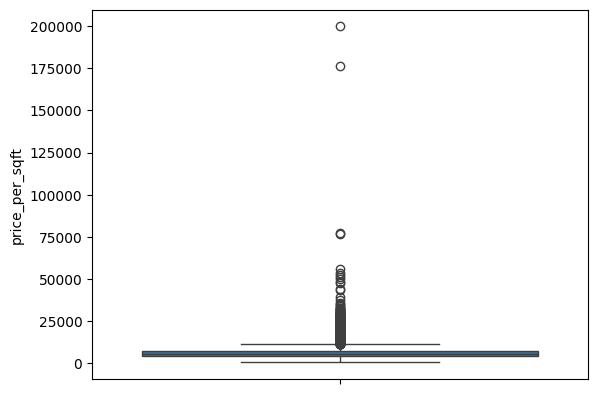

In [60]:
sns.boxplot(trimmed_df_using_zscore['price_per_sqft'])

## Compairing the outliers obtained from different methods

In [79]:
col1=trimmed_df_using_mean_std['price_per_sqft']
col2=trimmed_df_using_percentile['price_per_sqft']
col3=trimmed_df_using_iqr['price_per_sqft']
col4=trimmed_df_using_zscore['price_per_sqft']


In [83]:
data1=[col1,col2,col3,col4]

Text(0.5, 1.0, 'Boxplots of the different outlier detection methods')

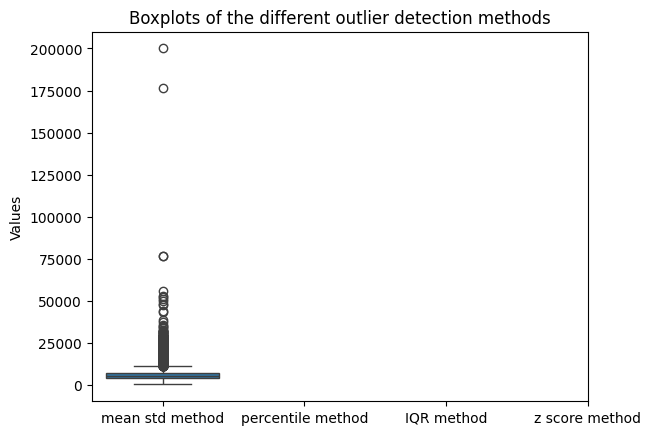

In [84]:
sns.boxplot(data=data1)
plt.xticks([0, 1, 2, 3], ['mean std method', 'percentile method', 'IQR method', 'z score method'])
plt.ylabel('Values')
plt.title('Boxplots of the different outlier detection methods')

## From this boxplot we can see that the best method  to remove outlier was IQR

In [64]:
df1=trimmed_df_using_iqr.copy()  # copying the dataframe cleaned using IQR to a new df

## Drawing a histplot to check the normality of the column 'price per sqft' from the dataframe cleaned using IQR method since it gave the best boxplot

<Axes: xlabel='price_per_sqft', ylabel='Count'>

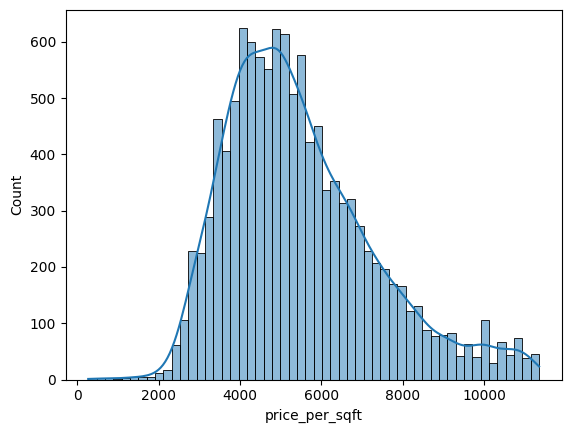

In [65]:
sns.histplot(data=df1,x=df1.price_per_sqft,kde=True)

## The plot appears to be right skewed

## Checking the skewness and kurtosis

In [66]:
df1['price_per_sqft'].skew()

0.8648849157625458

In [67]:
kurtosis(df1['price_per_sqft'],fisher=False)

3.5468036953751816

## Transforming the data with cuberoot transformation

In [68]:
df1['cbrt_price_per_sqft']=np.cbrt(df1['price_per_sqft'])

In [69]:
df1['cbrt_price_per_sqft'].skew()

0.25578995850804

In [70]:
kurtosis(df1['cbrt_price_per_sqft'],fisher=False)

3.1433638607586687

<Axes: xlabel='cbrt_price_per_sqft', ylabel='Count'>

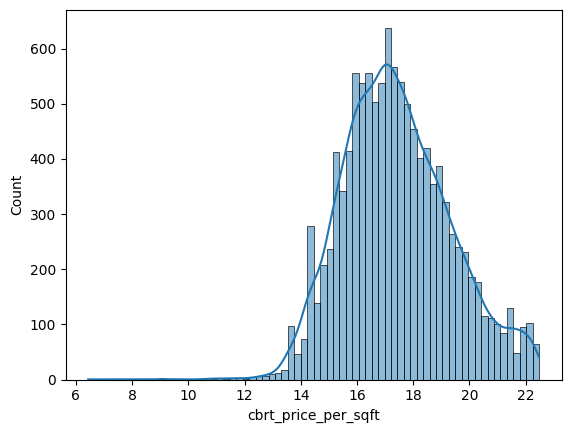

In [71]:
sns.histplot(data=df1,x=df1.cbrt_price_per_sqft,kde=True)

## Plotting heatmap to get the correaltion between all numerical columns

In [72]:
correlation=df1[['total_sqft','bath','price','bhk','price_per_sqft']].corr()

<Axes: >

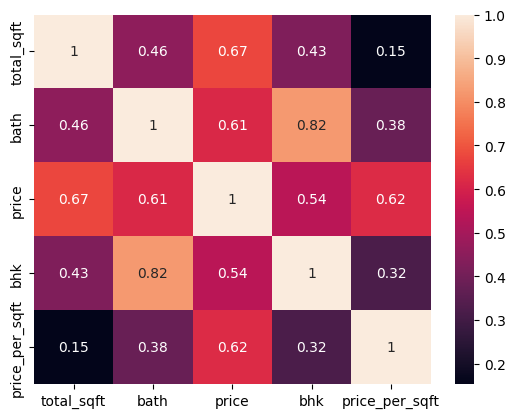

In [73]:
sns.heatmap(correlation,annot=True)

In [74]:
df2=df1.copy() # making a copy of df1

In [75]:
df2=df2.drop(columns=['cbrt_price_per_sqft']) # droing the cuberoot column

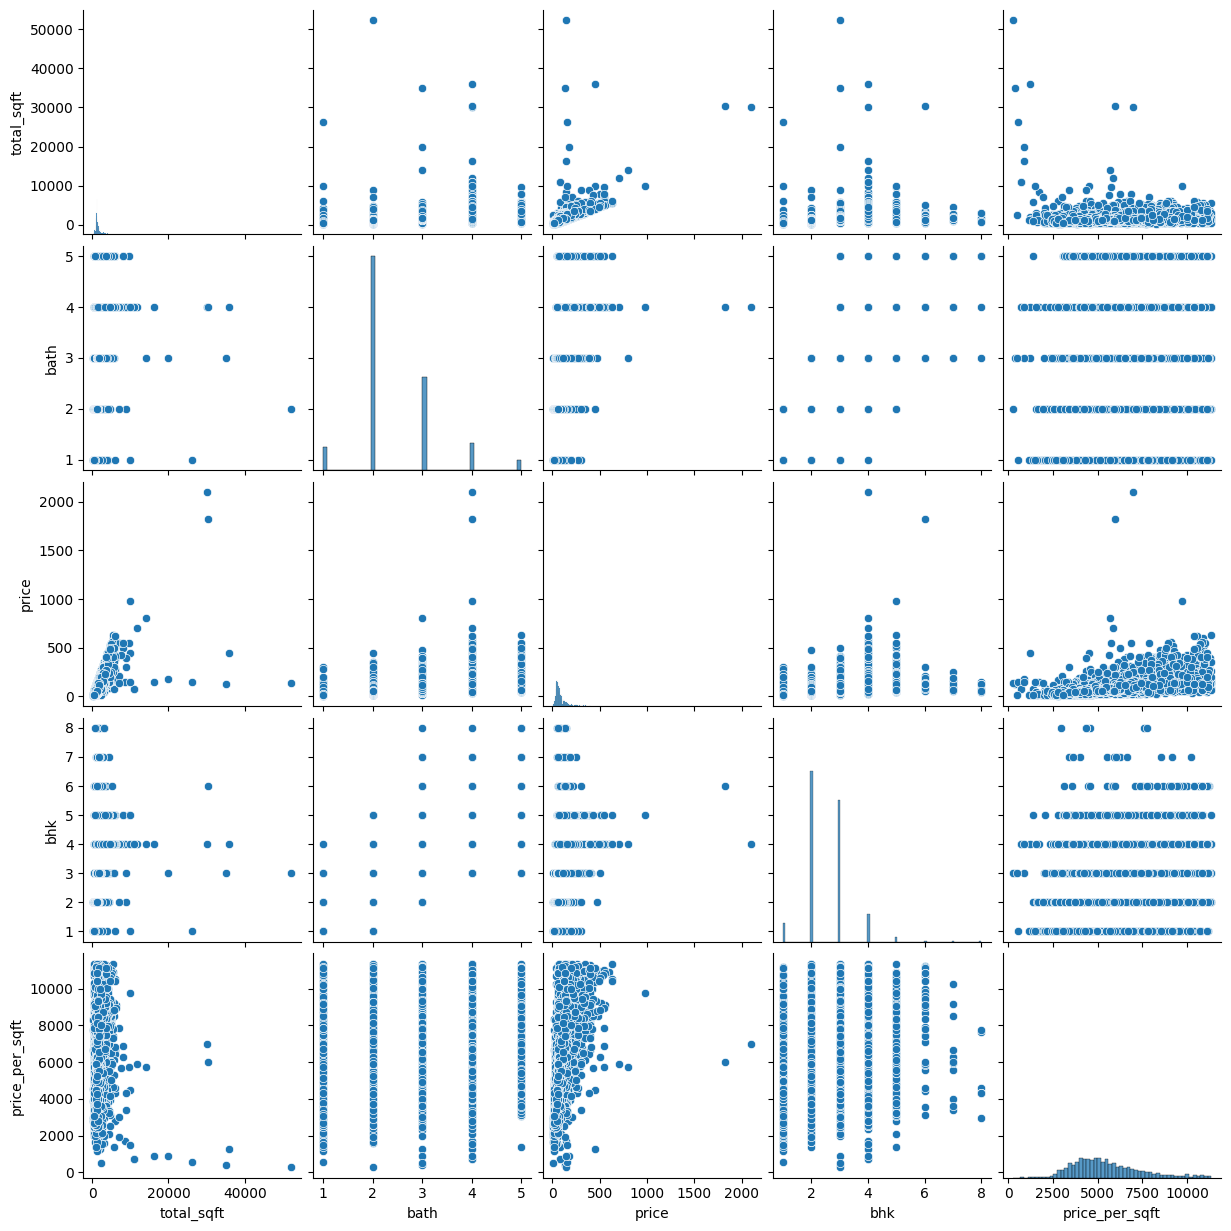

In [76]:
sns.pairplot(df2)